In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target

df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
x = df_diabetes['bmi'].values.reshape(-1,1)
y = df_diabetes['target'].values.reshape(-1,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) # Creates model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred = regressor.predict(X_train)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficientes: \n', regressor.coef_)
print('Independent term: \n', regressor.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(Y_train, y_pred))

Coefficientes: 
 [[1013.17358257]]
Independent term: 
 [153.43509039]
Mean squared error: 3892.72


In [53]:
print(regressor.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_train, y_pred))


0.23132831307953805
Variance score: 0.38


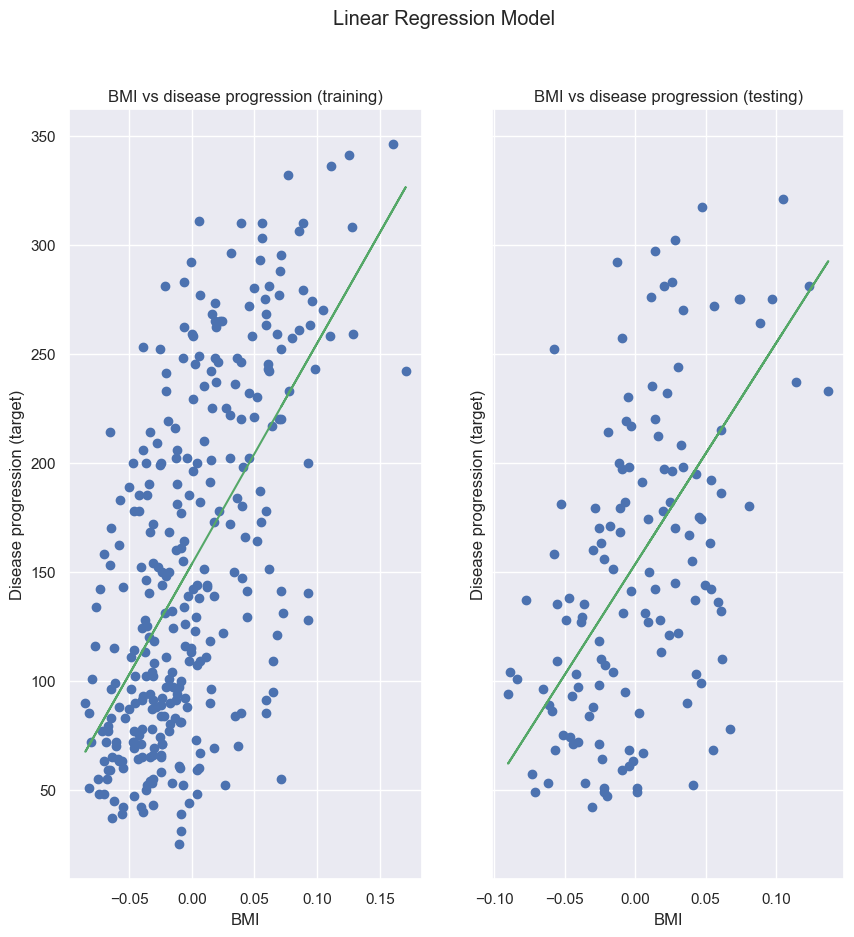

In [54]:
sns.set_theme()

fig, ax = plt.subplots(1,2, figsize=(10,10), sharey=True)

# Training
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('BMI vs disease progression (training)')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Disease progression (target)')

# Testing
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_test, regressor.predict(X_test), c='g')
ax[1].set_title('BMI vs disease progression (testing)')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Disease progression (target)')

plt.suptitle('Linear Regression Model')
plt.show()


In [55]:
xx = df_diabetes[['bmi']].values
yy = df_diabetes['target'].values.reshape(-1, 1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.23132831307953805